<a href="https://colab.research.google.com/github/MaxTTG/ML-algos/blob/main/Gradient_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient Boosting

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import make_regression
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.tree import DecisionTreeRegressor, plot_tree

In [3]:
learning_rate = 0.1

In [4]:
X, y = make_regression(n_samples=20, n_features=3)
df = pd.DataFrame(X)
df['y_true'] = y
df['pred_0'] = y.mean()
print(df['pred_0'])
df

0     11.443892
1     11.443892
2     11.443892
3     11.443892
4     11.443892
5     11.443892
6     11.443892
7     11.443892
8     11.443892
9     11.443892
10    11.443892
11    11.443892
12    11.443892
13    11.443892
14    11.443892
15    11.443892
16    11.443892
17    11.443892
18    11.443892
19    11.443892
Name: pred_0, dtype: float64


,0,1,2,y_true,pred_0
0,-0.362428,-0.461346,1.009724,-0.405728,11.443892
1,-0.209086,-0.718309,0.369167,-36.248922,11.443892
2,-1.294126,-1.124093,1.278680,-45.946728,11.443892
3,-0.549209,-0.561873,0.042916,-41.648330,11.443892
4,-0.876849,2.326886,1.811088,197.709786,11.443892
5,0.011243,-0.305526,0.656082,2.606973,11.443892
6,0.085098,0.482158,-0.164222,26.405102,11.443892
7,0.540468,0.386827,0.478893,47.828521,11.443892
8,-0.139630,0.725728,0.224149,52.012031,11.443892
9,-0.499036,0.380474,-0.938867,-13.692362,11.443892


In [5]:
df['residual_0'] = df['y_true'] - df['pred_0']
df

,0,1,2,y_true,pred_0,residual_0
0,-0.362428,-0.461346,1.009724,-0.405728,11.443892,-11.849620
1,-0.209086,-0.718309,0.369167,-36.248922,11.443892,-47.692814
2,-1.294126,-1.124093,1.278680,-45.946728,11.443892,-57.390620
3,-0.549209,-0.561873,0.042916,-41.648330,11.443892,-53.092222
4,-0.876849,2.326886,1.811088,197.709786,11.443892,186.265894
5,0.011243,-0.305526,0.656082,2.606973,11.443892,-8.836919
6,0.085098,0.482158,-0.164222,26.405102,11.443892,14.961209
7,0.540468,0.386827,0.478893,47.828521,11.443892,36.384629
8,-0.139630,0.725728,0.224149,52.012031,11.443892,40.568139
9,-0.499036,0.380474,-0.938867,-13.692362,11.443892,-25.136254


Создаём пенёк и обучаем его

In [6]:
tree_0 = DecisionTreeRegressor(max_depth=1)
tree_0.fit(df[[0,1,2]], df['residual_0'])
df['pred_1'] = df['pred_0'] + learning_rate * tree_0.predict(df[[0,1,2]])
df

,0,1,2,y_true,pred_0,residual_0,pred_1
0,-0.362428,-0.461346,1.009724,-0.405728,11.443892,-11.849620,9.480708
1,-0.209086,-0.718309,0.369167,-36.248922,11.443892,-47.692814,9.480708
2,-1.294126,-1.124093,1.278680,-45.946728,11.443892,-57.390620,9.480708
3,-0.549209,-0.561873,0.042916,-41.648330,11.443892,-53.092222,9.480708
4,-0.876849,2.326886,1.811088,197.709786,11.443892,186.265894,29.112545
5,0.011243,-0.305526,0.656082,2.606973,11.443892,-8.836919,9.480708
6,0.085098,0.482158,-0.164222,26.405102,11.443892,14.961209,9.480708
7,0.540468,0.386827,0.478893,47.828521,11.443892,36.384629,9.480708
8,-0.139630,0.725728,0.224149,52.012031,11.443892,40.568139,9.480708
9,-0.499036,0.380474,-0.938867,-13.692362,11.443892,-25.136254,9.480708


[Text(0.5, 0.75, 'x[1] <= 1.526\nsquared_error = 4616.903\nsamples = 20\nvalue = -0.0'),
 Text(0.25, 0.25, 'squared_error = 1265.606\nsamples = 18\nvalue = -19.632'),
 Text(0.75, 0.25, 'squared_error = 91.764\nsamples = 2\nvalue = 176.687')]

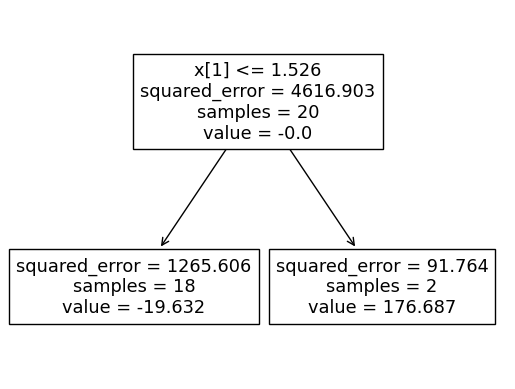

In [7]:
plot_tree(tree_0)

In [8]:
a = mean_squared_error(df['y_true'], df['pred_0'])
b = mean_squared_error(df['y_true'], df['pred_1'])
print('Ошибка до:\t' + str(a) + '\nОшибка после:\t' + str(b))
print('Ошибка ' + 'уменьшилась' if a > b else 'не изменилась или стало хуже')

Ошибка до:	4616.9028488350095
Ошибка после:	3957.8534540106766
Ошибка уменьшилась


Повторяем шаг бустинга

In [9]:
df['residual_1'] = df['y_true'] - df['pred_1']
tree_1 = DecisionTreeRegressor(max_depth=1)
tree_1.fit(df[[0,1,2]], df['residual_1'])
df['pred_2'] = df['pred_1'] + learning_rate * tree_1.predict(df[[0,1,2]])
df

,0,1,2,y_true,pred_0,residual_0,pred_1,residual_1,pred_2
0,-0.362428,-0.461346,1.009724,-0.405728,11.443892,-11.849620,9.480708,-9.886436,7.713843
1,-0.209086,-0.718309,0.369167,-36.248922,11.443892,-47.692814,9.480708,-45.729631,7.713843
2,-1.294126,-1.124093,1.278680,-45.946728,11.443892,-57.390620,9.480708,-55.427436,7.713843
3,-0.549209,-0.561873,0.042916,-41.648330,11.443892,-53.092222,9.480708,-51.129038,7.713843
4,-0.876849,2.326886,1.811088,197.709786,11.443892,186.265894,29.112545,168.597241,45.014332
5,0.011243,-0.305526,0.656082,2.606973,11.443892,-8.836919,9.480708,-6.873736,7.713843
6,0.085098,0.482158,-0.164222,26.405102,11.443892,14.961209,9.480708,16.924393,7.713843
7,0.540468,0.386827,0.478893,47.828521,11.443892,36.384629,9.480708,38.347813,7.713843
8,-0.139630,0.725728,0.224149,52.012031,11.443892,40.568139,9.480708,42.531323,7.713843
9,-0.499036,0.380474,-0.938867,-13.692362,11.443892,-25.136254,9.480708,-23.173071,7.713843


In [10]:
a = mean_squared_error(df['y_true'], df['pred_1'])
b = mean_squared_error(df['y_true'], df['pred_2'])
print('Ошибка до:\t' + str(a) + '\nОшибка после:\t' + str(b))
print('Ошибка ' + 'уменьшилась' if a > b else 'не изменилась или стало хуже')

Ошибка до:	3957.8534540106766
Ошибка после:	3424.0234442029678
Ошибка уменьшилась


и так далее...

Сделаем реализацию

In [11]:
class GradBooster():
    def __init__(self, epoch: int=100,
                 learning_rate: float=0.1,
                 max_tree_depth: int=1,
                 info: bool=False):
        self.epoch = epoch
        self.learning_rate = learning_rate
        self.max_tree_depth = max_tree_depth
        self.info = info

        self.mse_stat = []
        self.trees = []
        self.mean:int = None

    def fit(self, X:pd.DataFrame, y:pd.DataFrame):
        self.trees = []
        self.mean = y.mean()
        residual = pd.DataFrame([0] * y.index)
        pred = pd.DataFrame([self.mean] * len(y.index))
        for i in range(self.epoch):
            residual = y - pred
            tree = DecisionTreeRegressor(max_depth=self.max_tree_depth)
            tree.fit(X, residual)
            self.trees.append(tree)
            pred += self.learning_rate * pd.DataFrame(tree.predict(X))
            self.mse_stat.append(mean_squared_error(pred, y))

    def predict(self, X:pd.DataFrame) -> pd.DataFrame:
        pred = pd.DataFrame([self.mean] * len(X.index))
        for tree in self.trees:
            pred += self.learning_rate * pd.DataFrame(tree.predict(X))
        return pred

    def plot_fit_stat(self):
        import matplotlib.pyplot as plt
        plt.plot(self.mse_stat)
        plt.show()

660.9158642963974


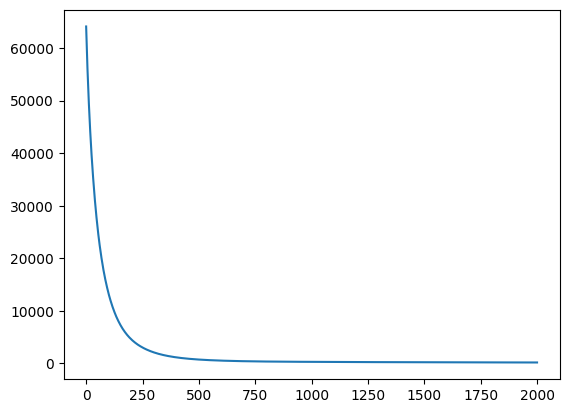

In [12]:
from sklearn.datasets import make_regression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree


if __name__ == '__main__':
    samp = 1000
    feat = 10
    reg_data, reg_target = make_regression(n_samples=samp, n_features=feat)

    X_train, X_test, y_train, y_test = train_test_split(
        reg_data,
        reg_target,
        train_size=0.90,
        random_state=42
        )
    X_train = pd.DataFrame(X_train)
    y_train = pd.DataFrame(y_train)
    X_test = pd.DataFrame(X_test)
    y_test = pd.DataFrame(y_test)

    gb = GradBooster(epoch=2000, max_tree_depth=1, info=True)
    gb.fit(X_train, y_train)
    y_pred = gb.predict(X_test)

    print(mean_squared_error(y_test, y_pred))
    gb.plot_fit_stat()